# The Sparks Foundation #GRIP21

## Task 2: Prediction using Unsupervised ML

### Aim of the project: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Author: Hemanth Kumar Bolli

##### Github profile link:

##### Youtube video link:

In [2]:
#Importing The Required Libraries
import numpy as np #Linear algebra
import pandas as pd #Data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Load the dataset
Iris=pd.read_csv('Iris.csv')
Iris.head(n=10)# checking the first 10 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
Iris.info()#Checking the type of data we have in dataset
Iris.isnull().sum()#Checking for null values, as there is no missing data.Hence we can process the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
Iris.describe() # Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
Iris.shape # shape function is used to find the length of the dataset

(150, 6)

In [12]:
#Now dropping the Id column, which is unnecessary for further analysis
Iris.drop('Id',axis=1,inplace=True)#axis=1 means removing col wise
Iris.head(n=10)#Again checking for the first 10 rows of dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


###### In the above data we have removed Id col which is unnecessary, now data is all good for further analysis..

### Data cleaning is done, now it's time for some Exploratory Data Analysis(EDA) First and foremost,we are going to see how data is distributed among Sepal length and Sepal width using a Scatter plot

##### A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded, one additional variable can be displayed.

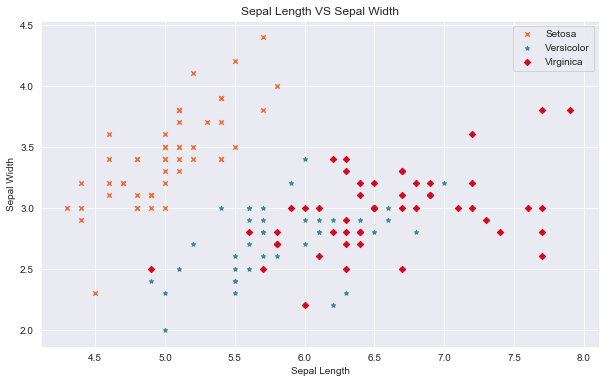

In [14]:
#Exploratory Data Analysis
#Sepal Length VS Sepal Width
fig=Iris[Iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',marker='x',color='#fa6c33',label='Setosa')
fig=Iris[Iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',marker='*',color='#3c8991',label='Versicolor',ax=fig)
fig=Iris[Iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',marker='D',color='#d5081e',label='Virginica',ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Sepal Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
sns.set_style("darkgrid")
plt.show()

##### The above plot shows the relationship between Sepal Length and Sepal Width** Wow! The above plot looks so amazing,now i am so excited to see how data is distributed among Petal Length and Petal Width..

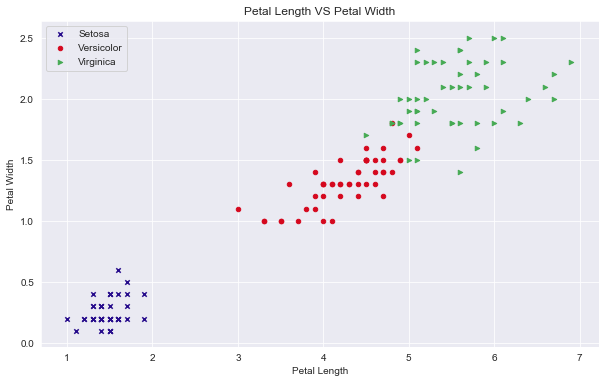

In [15]:
#Exploratory Data Analysis
#Petal Length VS Petal Width
fig=Iris[Iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',marker='x',color='#270c8c',label='Setosa')
fig=Iris[Iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',marker='o',color='#d5081e',label='Versicolor',ax=fig)
fig=Iris[Iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',marker='>',color='#45aa53',label='Virginica',ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length VS Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
sns.set_style("darkgrid")
plt.show()

##### The above plot shows the relationship between Petal Length and Petal Width.Now let us see how length and width may vary according to the species

### using violin plot from seaborn

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator

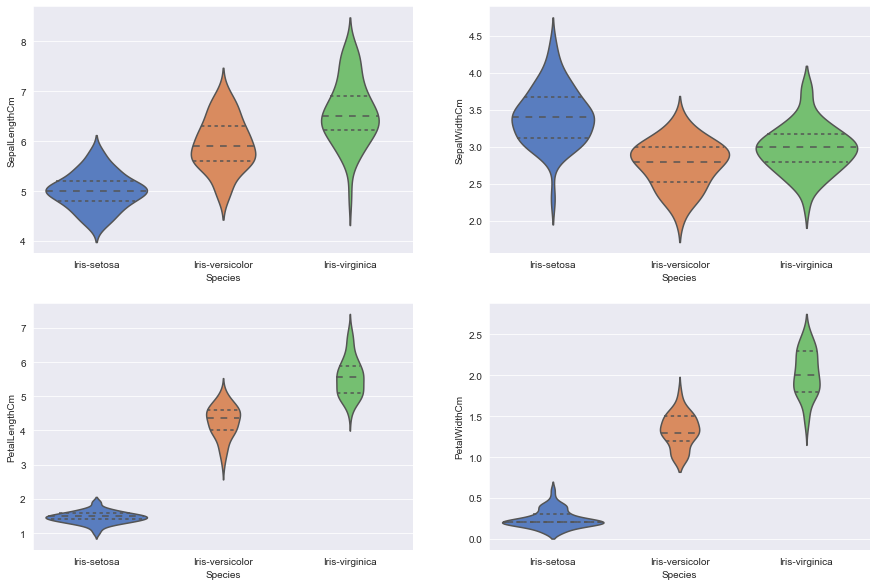

In [16]:
#Violin plot

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',palette='muted',inner='quartile',data=Iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',palette='muted',inner='quartile',data=Iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',palette='muted',inner='quartile',data=Iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',palette='muted',inner='quartile',data=Iris)
plt.show()

##### The above violin plot shows density of length and width of the Species..the thinner part shows that there is lesser density..The thicker part shows that there is higher density

#### Now lets see how length and width are distributed among Sepals and Petals using a histogram
A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

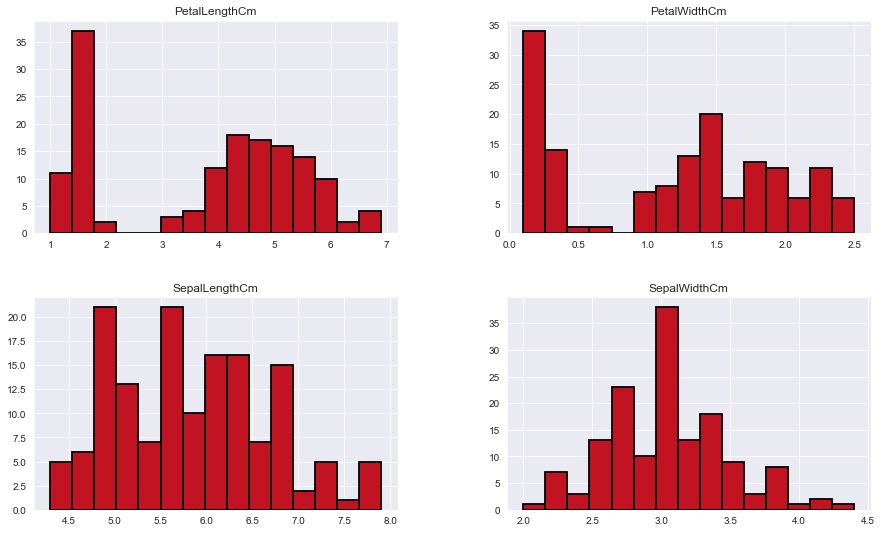

In [17]:
#Histogram
Iris.hist(edgecolor='black', bins=15,color='#C11321',linewidth=1.8)
fig=plt.gcf()
fig.set_size_inches(15,9)
plt.show()

##### The above plot shows how length and width are distributed..hope you liked my presentation..let's see some more.. Let's check Pair Plot**

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

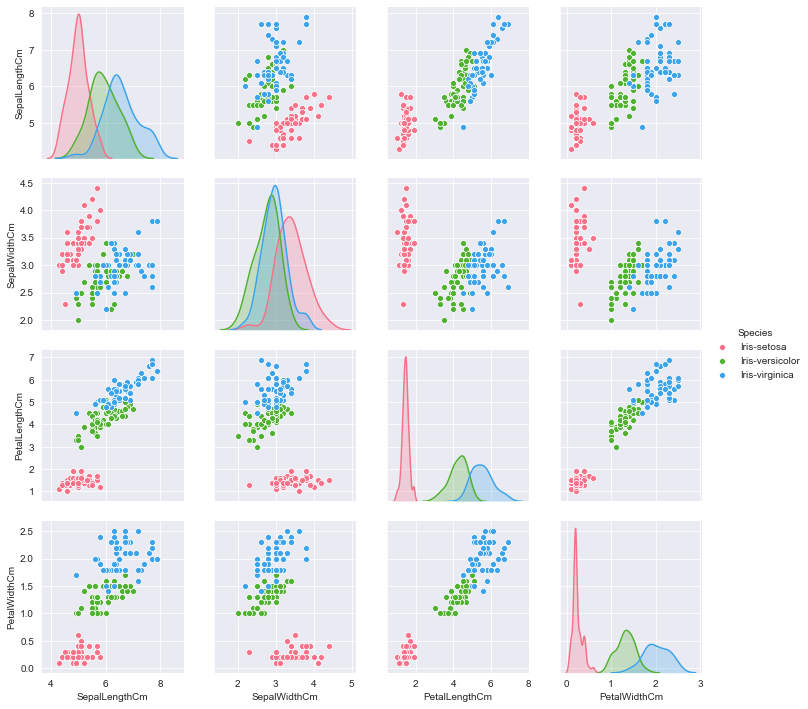

In [18]:
# Pair Plot using seaborn library
pairplot=sns.pairplot(Iris,hue='Species',palette='husl',diag_kind="kde",kind='scatter')

#### Area Plot : Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

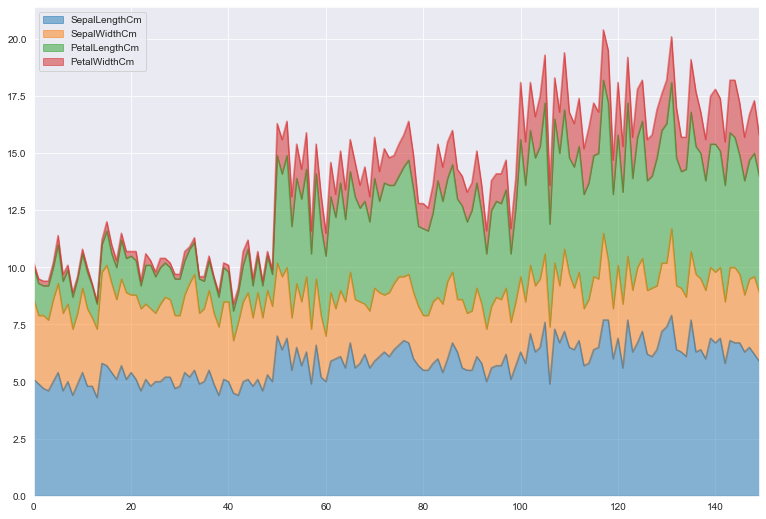

In [19]:
# Area Plot
Iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.5,figsize=(13,9));

### As in this dataset we dont have a proper target column henceforth we are not predicting anything, we are just visualising the data and find out the optimum number of clusters. This comes under un-supervised machine learning and am choosing K-Means Clustering algorithm

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

#### This can be achieved by elbow curve

In [45]:
#Taking the required columns from the dataset
Iris_x=Iris.iloc[:,[1,2,3,4]].values

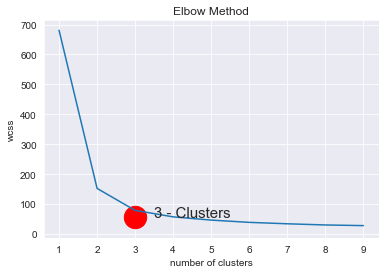

In [63]:
#Determing the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit_transform(Iris_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.scatter(3, wcss[3], c = 'red',s = 500)
plt.text(3 + 0.5, wcss[3], s = '3 - Clusters', fontsize = 15)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
sns.set_style('darkgrid')
plt.show()

#### From the above plot,we can see that there is sharp turn at 3rd cluster,after that there is no significant change in the curve.Hence n_clusters=3

In [47]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Iris_x)

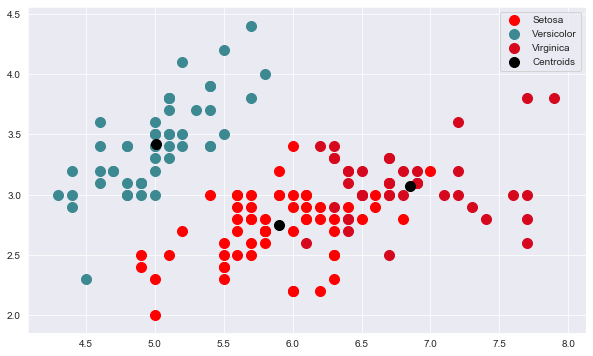

In [53]:
# Visualising the clusters - On the first two columns
plt.scatter(Iris_x[y_kmeans == 0, 0], Iris_x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Setosa')
plt.scatter(Iris_x[y_kmeans == 1, 0], Iris_x[y_kmeans == 1, 1], 
            s = 100, c = '#3c8991', label = 'Versicolor')
plt.scatter(Iris_x[y_kmeans == 2, 0], Iris_x[y_kmeans == 2, 1],
            s = 100, c = '#d5081e', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
fig=plt.gcf()
fig.set_size_inches(10,6)
sns.set_style("darkgrid")
plt.legend()

## This concludes the k-means clustering and black dots are centroids.Thanks for watching this kernel and hope you liked it !! Bravo